# Loading data from github into collab for analysis

In [1]:
!git clone https://github.com/prateeksab/housingprices.git
%cd housingprices/Data
%ls

Cloning into 'housingprices'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (29/29), done.
/content/housingprices/Data
AmesDummyData.csv  AmesHousing_update.csv  sample_submission.csv  train.csv
AmesHousing.csv    data_description.txt    test.csv


# Loading all the libraries

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              7903.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        00:14:58   Log-Likelihood:                         -18518.
No. Observations:                1460   AIC:                                  3.704e+04
Df Residuals:                    1459   BIC:                                  3.704e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YearBuilt     92.0802      1.036     88.899      0.000      90.048      94.112
==============================================================================
Omnibus:                      635.651   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3819.687
Skew:                           1.947   Prob(JB):                         0.00
Kurtosis:                       9.902   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

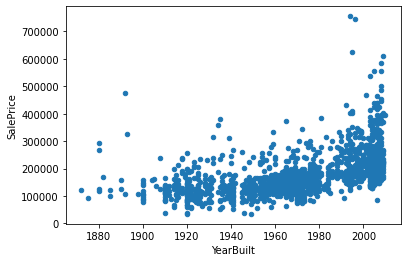

In [5]:
# Explore relation between SalePrice and YearBuilt
df.plot.scatter(x='YearBuilt',y='SalePrice')
X=df['YearBuilt']
y=df['SalePrice']
mod_price_vs_yearbuilt=sm.OLS(endog=y,exog=X).fit()
mod_price_vs_yearbuilt.summary()


Positive relationship between SalesPrice and YearBuilt

In [6]:
current_year = 2021
df['afterremodelage'] = 2021 - df['YearRemodAdd']

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              1356.
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   1.90e-210
Time:                        00:14:58   Log-Likelihood:                         -19395.
No. Observations:                1460   AIC:                                  3.879e+04
Df Residuals:                    1459   BIC:                                  3.880e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
afterremodelage  3295.3521     89.495     36.822      0.000    3119.800    3470.904
==============================================================================
Omnibus:                       64.534   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.327
Skew:                           0.480   Prob(JB):                     2.67e-17
Kurtosis:                       3.578   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

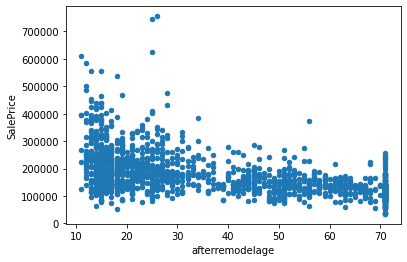

In [7]:
df.plot.scatter(x='afterremodelage',y='SalePrice')
X=df['afterremodelage']
y=df['SalePrice']
mod_price_vs_remodelage=sm.OLS(endog=y,exog=X).fit()
mod_price_vs_remodelage.summary()


# Exploring effect of neighborhood

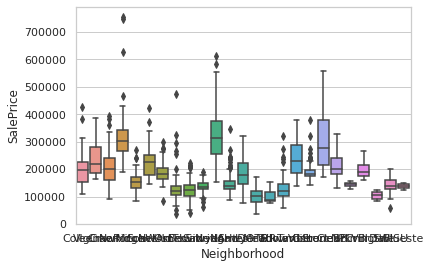

In [8]:
X = 'Neighborhood'
y= 'SalePrice'
#df.boxplot(column='SalePrice',by='Neighborhood',figsize=(30,10))
sns.set_theme(context='notebook',style='whitegrid')

ax = sns.boxplot(x=X,y=y,data=df,width=0.8, whis=1.5)

In [9]:
# Identify the most expensive neighborhoods on average
df_by_neighborhood = df.groupby(by='Neighborhood')
mean_prices_by_neighborhood = df_by_neighborhood['SalePrice'].mean()
mean_prices_by_neighborhood.sort_values(ascending=False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [10]:
# NoRidge, NridgHt, StoneBr have high prices. Investigate why
list_expensive_hoods = ['NoRidge','NridgHt','StoneBr']
df_expensive_hoods = df[df['Neighborhood'].isin(list_expensive_hoods)]

In [11]:
df_expensive_hoods

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,afterremodelage
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,21
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,...,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,15
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,...,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300,15
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,...,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300,14
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,...,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,...,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000,16
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,...,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500,19
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,781,Unf,0,503,1284,GasA,...,SBrkr,1310,1140,0,2450,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,Fin,3,1069,TA,TA,Y,0,126,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000,23
1426,1427,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1994,1994,Gable,CompShg,VinylSd,VinylSd,Br

In [12]:
df.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

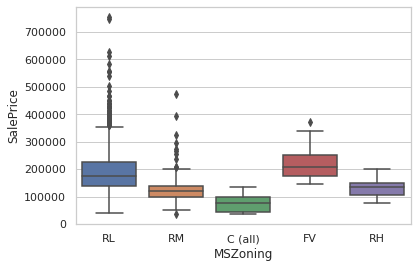

In [13]:
# Prices by each building type
X = 'MSZoning'
y= 'SalePrice'
#df.boxplot(column='SalePrice',by='Neighborhood',figsize=(30,10))
sns.set_theme(context='notebook',style='whitegrid')

ax = sns.boxplot(x=X,y=y,data=df,width=0.8, whis=1.5)

In [14]:
# Plotting a stacked bar graph
neighborhood_labels = list(df['Neighborhood'].unique())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f088f0f6dd0>]],
      dtype=object)

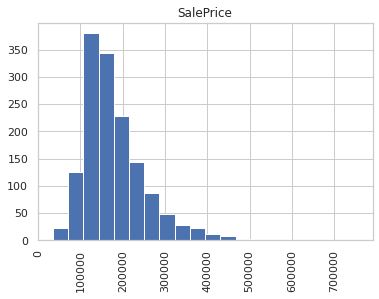

In [15]:
df.hist(column='SalePrice',bins=20,xrot=90.0)

# MV Analysis

## Read in Data

In [16]:
df2 = pd.read_csv('AmesDummyData.csv')

In [17]:
df2.head()

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,remodeled,MS Zoning_C (all),MS Zoning_FV,...,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,ms_type_1-1/2 STORY FINISHED ALL AGES,ms_type_1-1/2 STORY PUD - ALL AGES,ms_type_1-STORY 1945 & OLDER,ms_type_1-STORY 1946 & NEWER ALL STYLES,ms_type_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,ms_type_1-STORY W/FINISHED ATTIC ALL AGES,ms_type_2 FAMILY CONVERSION - ALL STYLES AND AGES,ms_type_2-1/2 STORY ALL AGES,ms_type_2-STORY 1945 & OLDER,ms_type_2-STORY 1946 & NEWER,ms_type_2-STORY PUD - 1946 & NEWER,ms_type_DUPLEX - ALL STYLES AND AGES,ms_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,ms_type_SPLIT FOYER,ms_type_SPLIT OR MULTI-LEVEL
0,0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,False,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,False,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,False,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,False,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,True,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [88]:
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  ...  SaleCondition  SalePrice afterremodelage
0        1          60       RL  ...         Normal     208500              18
1        2          20       RL  ...         Normal     181500              45
2        3          60       RL  ...         Normal     223500              19
3        4          70       RL  ...        Abnorml     140000              51
4        5          60       RL  ...         Normal     250000              21
...    ...         ...      ...  ...            ...        ...             ...
1455  1456          60       RL  ...         Normal     175000              21
1456  1457          20       RL  ...         Normal     210000              33
1457  1458          70       RL  ...         Normal     266500              15
1458  1459          20       RL  ...         Normal     142125              25
1459  1460          20       RL  ...         Normal     147500              56

[1460 rows x 82 colum

## Feature Groups

In [87]:
All_Integer_Fields = ['MSSubClass','LotArea', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
        # Removed 'Lot Frontage' due to a large number of missing values

## Data Cleanup Tools

In [49]:
# Remove the first column df2 = df2.iloc[: , 1:]


In [86]:
# print(df2)
# is_NaN = df2.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = df2[row_has_NaN]
# print(rows_with_NaN)

      Lot Frontage  Lot Area  ...  ms_type_SPLIT FOYER  ms_type_SPLIT OR MULTI-LEVEL
0            141.0     31770  ...                    0                             0
1             80.0     11622  ...                    0                             0
2             81.0     14267  ...                    0                             0
3             93.0     11160  ...                    0                             0
4             74.0     13830  ...                    0                             0
...            ...       ...  ...                  ...                           ...
2923          80.0     17400  ...                    0                             0
2924         160.0     20000  ...                    0                             0
2925          37.0      7937  ...                    0                             1
2928          77.0     10010  ...                    0                             0
2929          74.0      9627  ...                    0           

In [95]:
df_integer_only = df[All_Integer_Fields]

In [96]:
df_integer_only['SalePrice']=df['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_cleaned = df_integer_only.dropna()

In [99]:
df_cleaned

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


## Correlation Matrix

In [112]:
coefficients = lrmodel.coef_
print(coefficients)

[-2.11912435e+04 -1.02384080e+04 -3.42667305e+03 -6.78071295e+02
 -1.76258893e+02 -8.74302881e+01 -4.84323126e+01 -3.35979135e+01
 -4.83148891e+00 -1.06727759e+00 -6.57975997e-01 -2.03886511e-01
  1.81272315e-01  4.02802932e-01  3.82270156e+00  8.50426542e+00
  9.39027070e+00  9.60170579e+00  1.50481876e+01  1.69645068e+01
  1.96842305e+01  2.39251847e+01  2.85887773e+01  3.18088079e+01
  5.56470417e+01  1.19755446e+02  3.54902668e+02  1.81081340e+03
  2.54371120e+03  3.47815325e+03  5.28949566e+03  5.33353284e+03
  8.22724551e+03  1.58517341e+04  1.82463035e+04]


In [113]:
correlationmatrix = df_cleaned.corr()

In [114]:
print(correlationmatrix)

               MSSubClass   LotArea  OverallQual  ...    MoSold    YrSold  SalePrice
MSSubClass       1.000000 -0.134271     0.052093  ... -0.017137 -0.023214  -0.076177
LotArea         -0.134271  1.000000     0.090595  ...  0.001535 -0.012466   0.253793
OverallQual      0.052093  0.090595     1.000000  ...  0.063142 -0.016861   0.786212
OverallCond     -0.099393  0.000667    -0.135286  ... -0.011201  0.049790  -0.093886
YearBuilt        0.060624 -0.004377     0.570995  ...  0.005380 -0.007663   0.507696
YearRemodAdd     0.037283  0.004218     0.556807  ...  0.014006  0.039529   0.505673
MasVnrArea       0.033778  0.096315     0.403120  ... -0.010239 -0.004724   0.468083
BsmtFinSF1      -0.067707  0.209126     0.220754  ... -0.017817  0.020406   0.373079
BsmtFinSF2      -0.079862  0.110511    -0.072132  ... -0.018706  0.032882  -0.022252
BsmtUnfSF       -0.136835 -0.011381     0.320169  ...  0.031739 -0.043343   0.214471
TotalBsmtSF     -0.240887  0.250440     0.531361  ...  0.006493 -

In [115]:
import seaborn as sn
import matplotlib.pyplot as plt


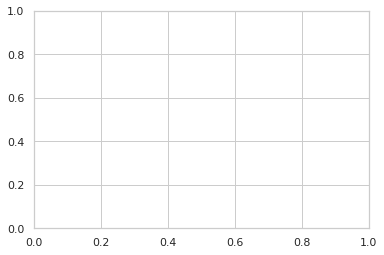

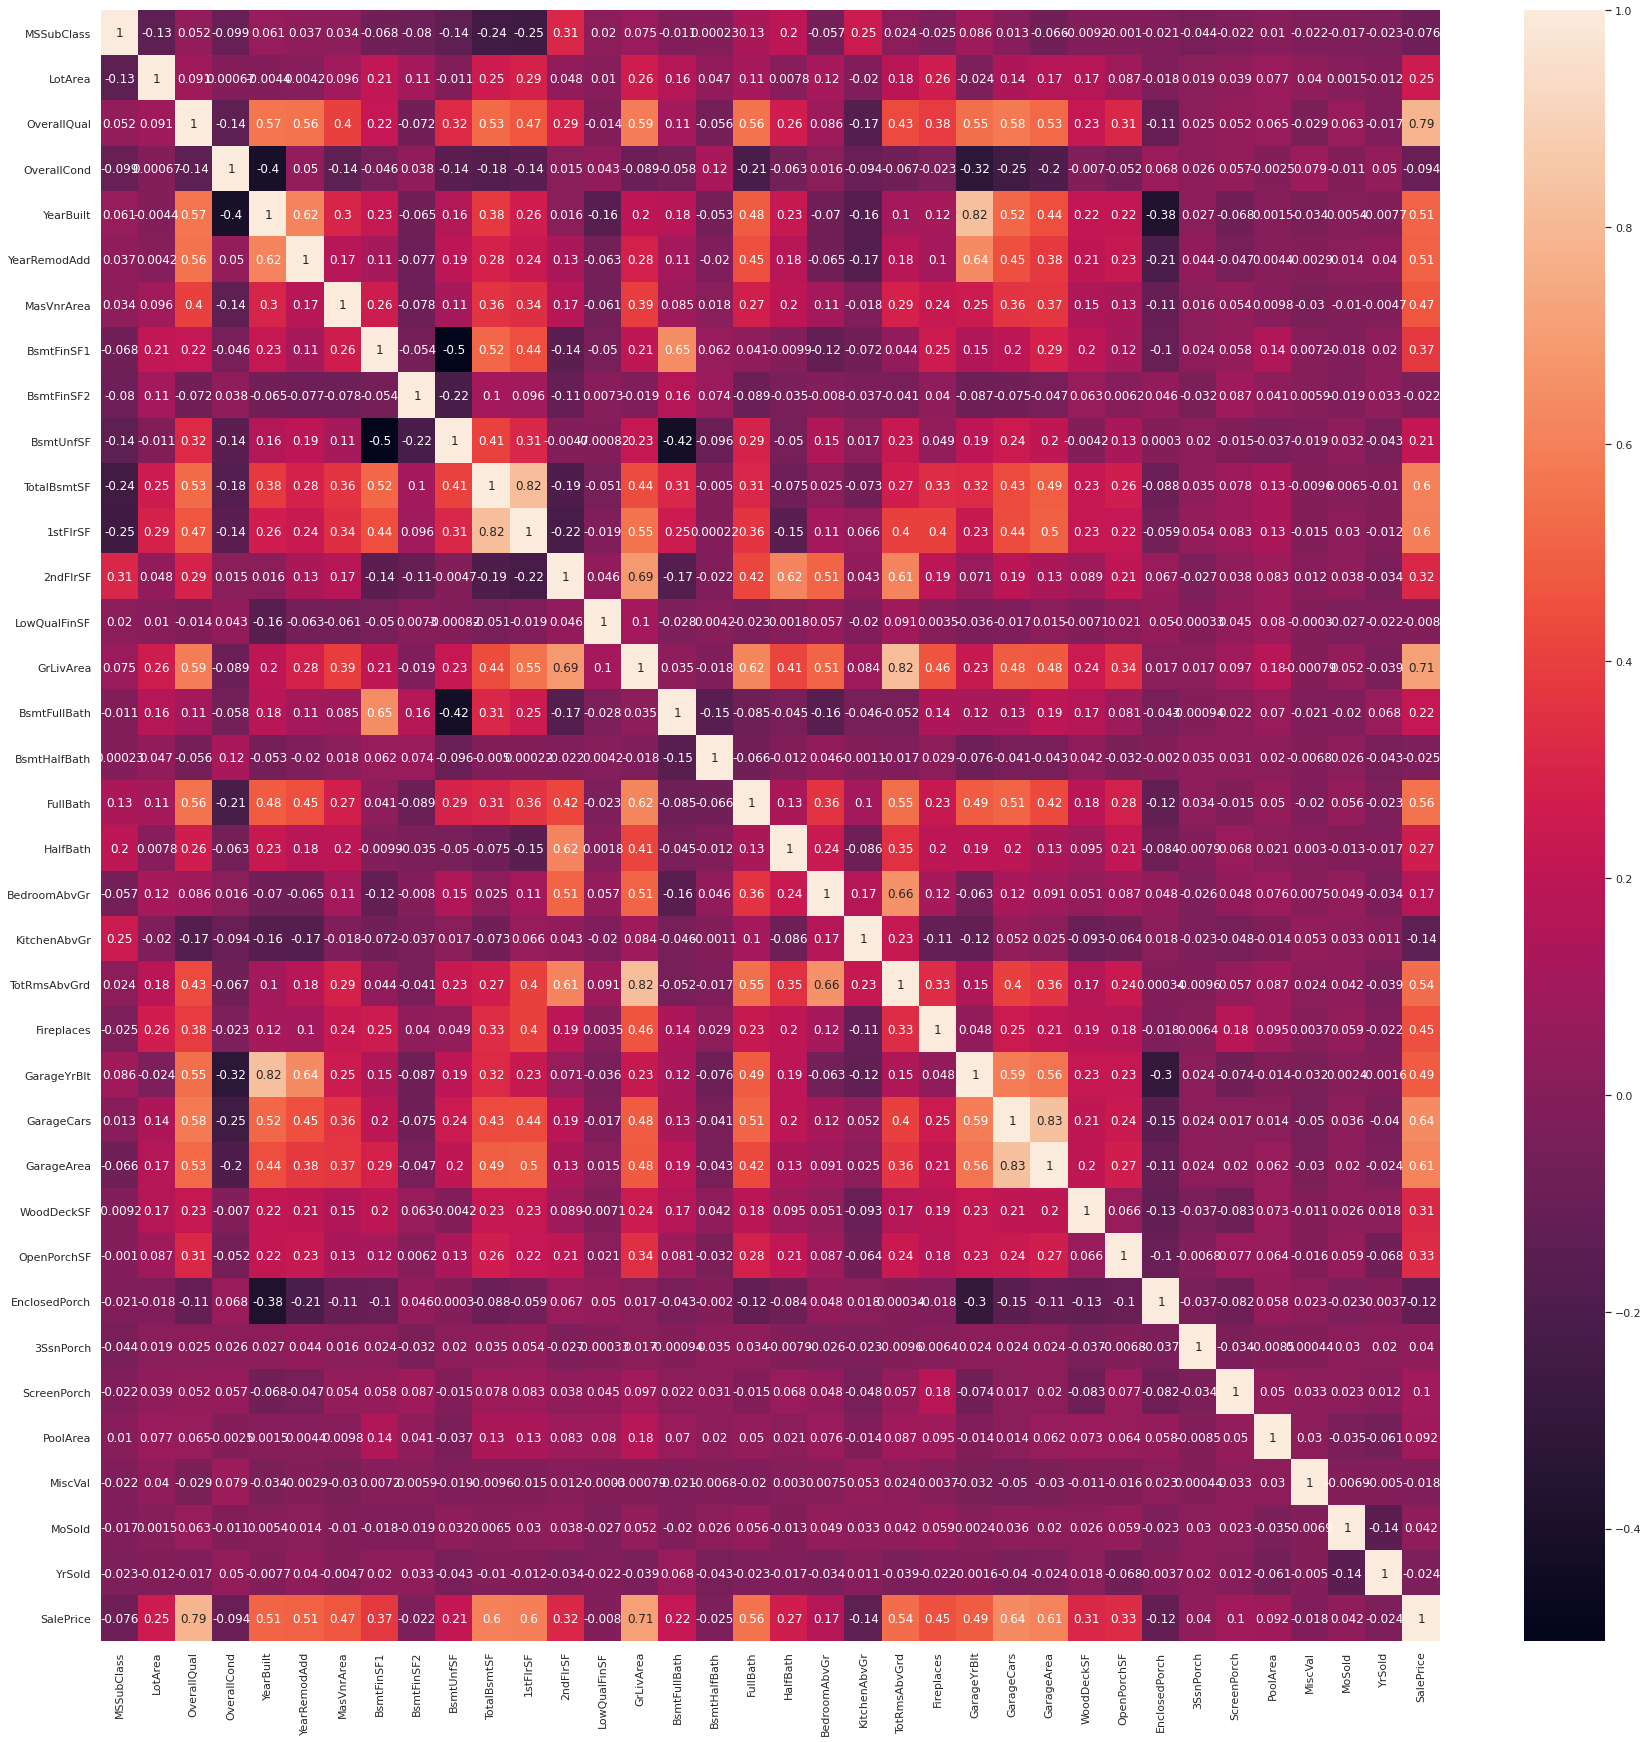

In [120]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,30))
ax = sn.heatmap(correlationmatrix,annot=True)
plt.show()

## Linear Regression

In [100]:
target = "SalePrice" #define the target column
predictors = All_Integer_Fields #define the predictor columns
X = df_cleaned[predictors] #define X as all predictor data
Y = df_cleaned[target] #define Y as all target data

In [129]:
lrmodel = LinearRegression()
lrmodel.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
preds = lrmodel.predict(X)

In [131]:
predictions_df = df_cleaned.assign(predictions=preds)

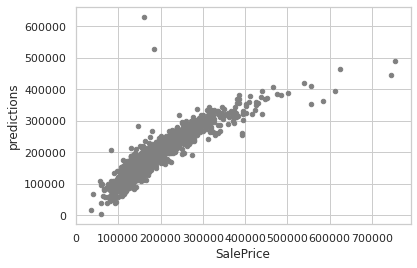

In [132]:
predictions_df.plot(kind='scatter', x='SalePrice', y ='predictions', c='gray')

In [138]:
from sklearn.model_selection import cross_val_score
avg_auc = cross_val_score(lrmodel, X, Y).mean()

In [139]:
avg_auc

0.7837274997532824

In [133]:
predictions_df[['SalePrice', 'predictions']]

,SalePrice,predictions
0,208500,227326.999582
1,181500,196131.987700
2,223500,221117.877601
3,140000,199111.305616
4,250000,294991.219730
...,...,...
1455,175000,181637.176100
1456,210000,245463.138102
1457,266500,227641.846721
1458,142125,132678.500205
